In [25]:
import numpy as np
import math
import functs
from matplotlib import pyplot as py
%matplotlib inline

In [26]:
N = 51
x_start, x_end = -2.0, 2.0
y_start, y_end = -0.5, 0.5
x = np.linspace(x_start, x_end, N)
y = np.linspace(y_start, y_end, N)
X , Y = np.meshgrid(x,y)

In [117]:
epsilon = 0.001 # offset
gamma = 5.0 # same circulation for all vortecies
n = 14 # amount of vortecies
a = (abs(x_start) + abs(x_end)) / n #distance between vortecies
x_v = np.linspace(-10, 10, n)
y_v = np.zeros_like(x_v)

In [119]:
u = np.zeros_like(X)
v = np.zeros_like(Y)

for i in range(0, n):
    u_once, v_once = functs.get_velocity_vortex(gamma, x_v[i], 0, X, Y)
    u += u_once
    v += v_once

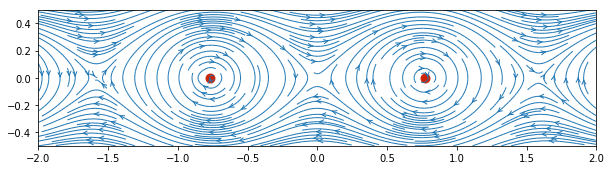

In [120]:
#plot streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(x_v, y_v, color='#CD2305', s = 80, marker='o');

In [111]:
def analytical_solutions(gamma, x, y, a):
    u = +(gamma/2*a)*(np.sinh(2*math.pi*y / a) /
                     (np.cosh(2*math.pi*y / a) - np.cos(2*math.pi*x / a)))
    
    v = -(gamma/2*a)*(np.sin(2*math.pi*x / a) / 
                     (np.cosh(2*math.pi*y / a) - np.cos(2*math.pi*x / a)))
    return u, v

u, v = analytical_solutions(gamma, X + epsilon, Y + epsilon, a)


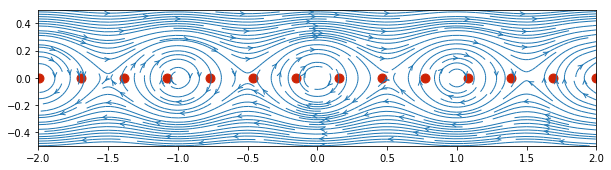

In [112]:
#plot streamlines
width = 10.0
height = (y_end - y_start) / (x_end - x_start) * width
py.figure(figsize=(width, height))
py.xlim(x_start, x_end)
py.ylim(y_start, y_end)
py.streamplot(X, Y, u, v, density=2, linewidth=1, arrowsize=1, arrowstyle='->')
py.scatter(x_v, y_v, color='#CD2305', s = 80, marker='o');